<a href="https://colab.research.google.com/github/mmontana83/procesamiento-imagenes-python/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2
*Pillow*

A partir de [esta imagen](https://drive.google.com/file/d/1_CJShAhhShNdOq1vGUK-9RZ8GQ3RhEOi/view?usp=sharing), obtener [esta imagen](https://drive.google.com/file/d/1YRF2U2_WD5GCJvcQVf2E5vp46dvuttW8/view?usp=sharing).

Nota: El procesamiento debe ser adaptivo a otras imágenes similares, esto significa que se deben usar proporciones de la imagen en lugar de cantidad de pixeles fijos.
Cómo ayuda, se sabe que:
- La imagen original se partió en 3 partes iguales;
- De la parte central, se utilizó el 60% de la altura de la imagen
- El recuadro está separado del borde un 2% en los laterales y 5% arriba y abajo y tiene un grosor fijo de 5px.
- La imagen resultante debe conservar las mismas dimensiones que la original y guardarse en formato PNG.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importar la biblioteca y mostrar la versión

In [ ]:
from PIL import Image, ImageDraw

print(Image.__version__)

7.1.2


Cargo la imagen original y la muestro

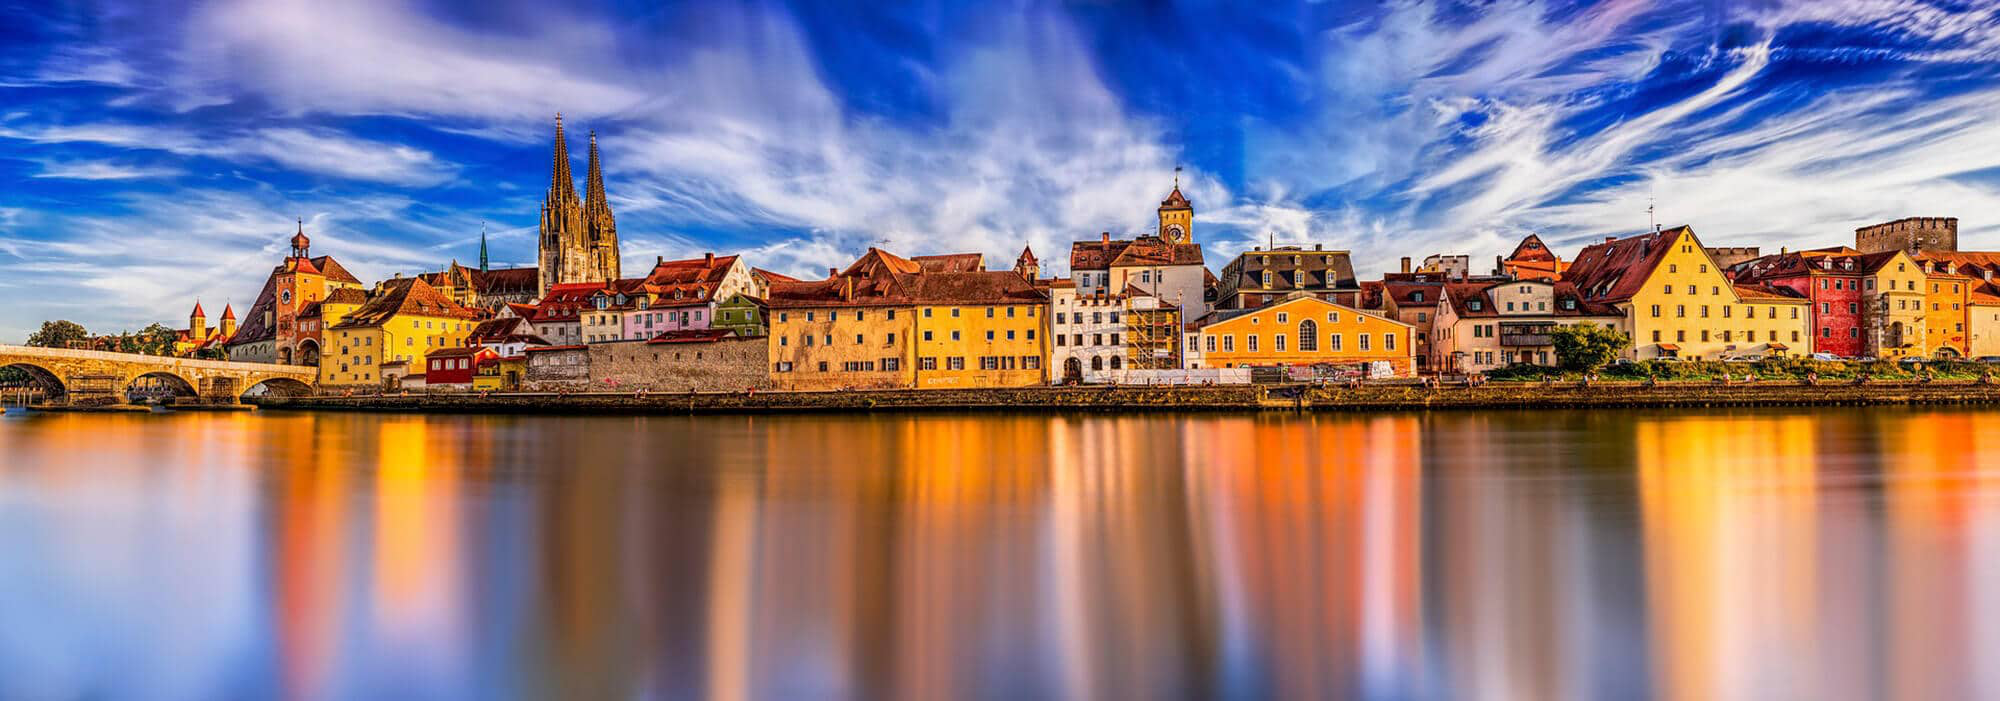

In [ ]:
# Abro la imagen
#im = Image.open('/content/drive/MyDrive/UPSO/Programación Avanzada Python/Código/glaciar.jpg')
im = Image.open('/content/drive/MyDrive/UPSO/Programación Avanzada Python/Código/fotografia-panoramica-fotografo.jpg')
im

Inicialmente, tengo que separar la imagen en 3 partes iguales a las cuales llamaré: REGIÓN 1, REGIÓN 2 Y REGIÓN 3

REGIÓN 1

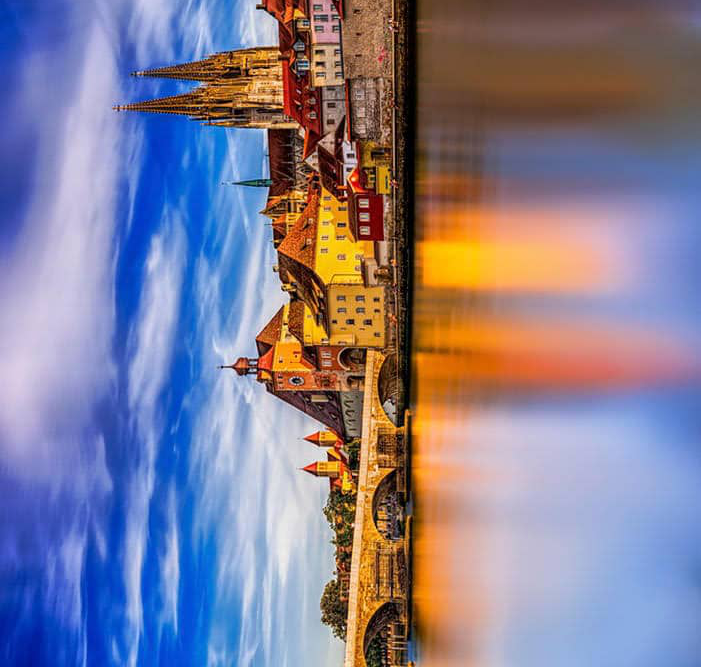

In [ ]:
#Obtengo la primer foto, la cual debo rotar a 90 grados a la izquierda
region1 = (0,0,im.width/3,im.height)
parte1 = im.crop(region1).transpose(Image.ROTATE_90)
parte1

REGIÓN 2

(666, 421)


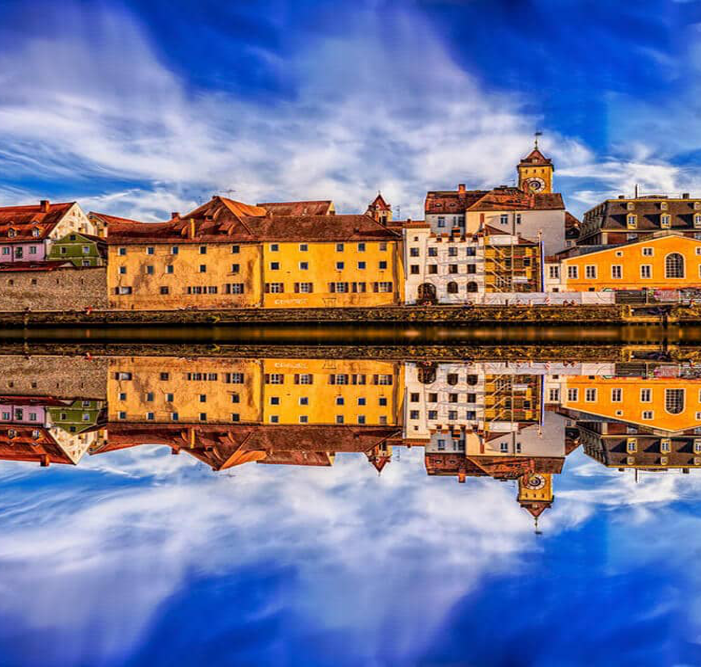

In [ ]:
#Obtengo la primera parte de la segunda foto, la cual tiene una altura del 60% de la imagen
region2 = (im.width/3,0,(im.width/3)*2,im.height*0.60)
parte2_up = im.crop(region2)

#la segunda parte de la segunda foto consiste en una copia reflejada hacia abajo.
parte2_esp = parte2_up.transpose(Image.FLIP_TOP_BOTTOM)
print(parte2_up.size)

#finalmente uno esas dos partes en la variable parte 2
parte2 = Image.new('RGB', (parte2_up.width, parte2_up.height*2), (255, 255, 255)) # Tipo, tamaño, color
parte2.paste(parte2_up, (0,0))
parte2.paste(parte2_esp, (0, parte2_up.height))

#igualo el tamaño de esta parte con la parte 1
parte2 = parte2.resize(parte1.size)

parte2

REGIÓN 3

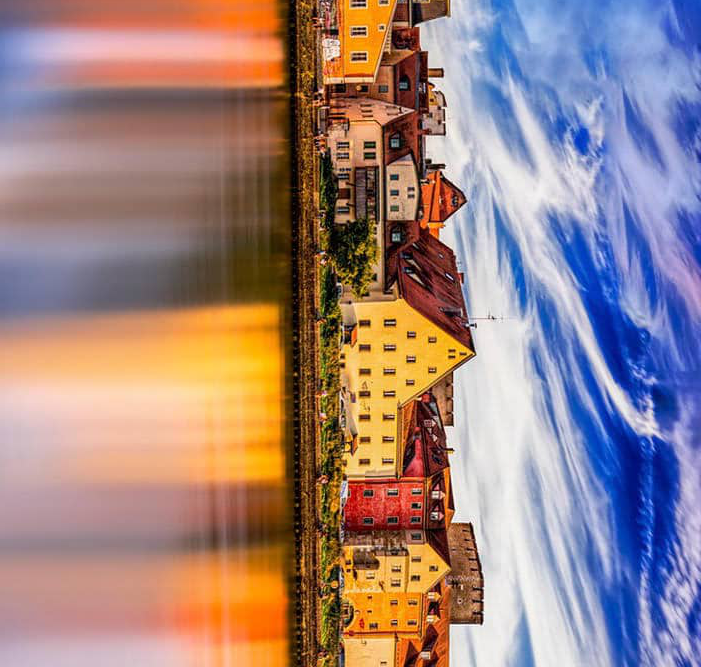

In [ ]:
#Obtengo la tercer foto, la cual debo rotar a 90 grados a la derecha
region3 = ((im.width/3)*2,0,im.width,im.height)
parte3 = im.crop(region3).transpose(Image.ROTATE_270)
parte3

Uno las partes de la nueva imagen Color, la recorto y la guardo. También guardo una copia de la imagen nueva, en las dimensiones originales pero en blanco y negro.

In [ ]:
im_color = Image.new('RGB', (parte1.width*3, parte1.height), (255, 255, 255)) # Tipo, tamaño, color

im_color.paste(parte1, (0,0))
im_color.paste(parte2, (parte1.width,0))
im_color.paste(parte3, (parte1.width*2, 0))

im_color = im_color.resize(im.size)

#convierto la imagen color en blanco&negro y la almaceno
im_bw = im_color.convert('L')
im_bw = im_bw.save('/content/drive/MyDrive/UPSO/Programación Avanzada Python/Código/im_bw.jpg')

#A la imagen color le saco los margenes del 2% en los laterales y el 5% arriba y abajo; luego la almaceno
im_color = im_color.crop((im_color.width*0.02,im_color.height*0.05,im_color.width - im_color.width*0.02,im_color.height - im_color.height*0.05))
im_color = im_color.save('/content/drive/MyDrive/UPSO/Programación Avanzada Python/Código/im_color.jpg')

In [ ]:
im_color = Image.open('/content/drive/MyDrive/UPSO/Programación Avanzada Python/Código/im_color.jpg').convert('RGB')
im_bw = Image.open('/content/drive/MyDrive/UPSO/Programación Avanzada Python/Código/im_bw.jpg').convert('RGB')

Pego las dos imagenes procesadas y recortadas, luego dibujo el recuadro y finalmente guardo el resultado final.

In [ ]:
#pego la imagen color sobre la imagen b&n
#im_bw.paste(im_color,(38, 27))
im_bw.paste(im_color,(round(im_bw.width*0.02), round(im_bw.height*0.05)))

#Dibujo el rectangulo con márgenes del 2% en los laterales y el 5% arriba y abajo; luego la almaceno
draw = ImageDraw.Draw(im_bw)

draw.rectangle([(im_bw.width*0.02,im_bw.height*0.05), (im_bw.width - im_bw.width*0.02,im_bw.height - im_bw.height*0.05)],
               outline = "white",
               width = 5)

#Guardo el resultado final en formato PNG
im_bw.save('/content/drive/MyDrive/UPSO/Programación Avanzada Python/Código/final_im.png', format='png')

Muestro el Resultado Final

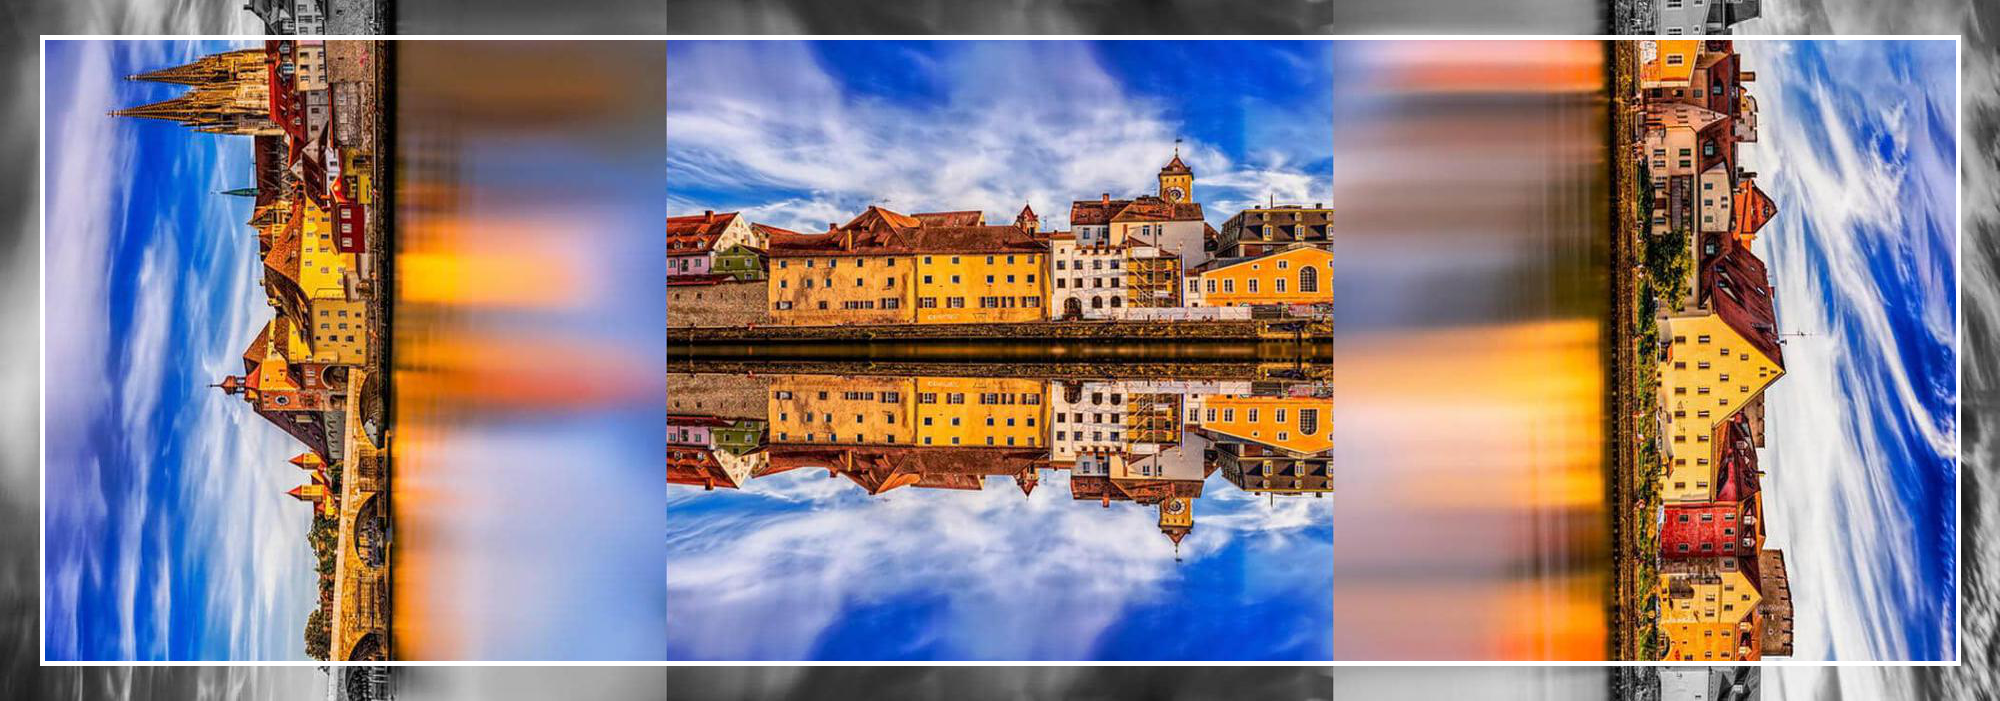

In [ ]:
final_im = Image.open('/content/drive/MyDrive/UPSO/Programación Avanzada Python/Código/final_im.png')
final_im